In [21]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '..')
from lmdps import hierarchical_gridworld as HG
import numpy as np
import random
from lmdps.plotting import plot_as_matrix as plotmat
import matplotlib.pyplot as plt

In [16]:
def get_rewards(state_idx):
    
    r = np.full((5,1), -1)
    
    if state_idx == 25:
        r[0] = 0
    elif state_idx == 26:
        r[1] = 0
    elif state_idx == 27:
        r[2] = 0
    elif state_idx == 28:
        r[3] = 0
    elif state_idx == 29:
        r[4] = 0

    return r

In [17]:
def get_importance_weights(P, Z_i, state_idx, next_state_idx):
        if state_idx>24:
            return P[state_idx, next_state_idx]
        else:
            values = P[state_idx, next_state_idx] * Z_i[:, next_state_idx]
            sums = np.einsum('j,ij->i', P[state_idx, :], Z_i)
                        
            res = (values / sums).reshape(-1, 1)

            return P[state_idx, next_state_idx] / res

In [18]:
r_dim = 5

goal_pos = (2,3)

t_map = {(0, -1, r_dim // 2): (0, 0, r_dim // 2),
             (0, r_dim // 2, -1): (0, r_dim // 2, 0),
             (0, 2, 5): (0, 2, r_dim - 1),
             (0, 5, 2): (0, r_dim - 1, 2),
             (1, *goal_pos): (0, *goal_pos)}

P, graph = HG._create_room_hierarchical(r_dim, t_map)

states=list(graph.nodes())
non_terminal = states[-5:]

In [19]:
Z = np.ones((5, 30))

P = np.asarray(P)

for t in range(900):
    
    state = random.choice(range(25))
    
    terminate = False
    
    alfa = 500 / (500 + t + 1)
    
    while not terminate:
        r = get_rewards(state)
        next_state = np.random.choice(range(30), p=P[state])
        
        w_i_a = get_importance_weights(P, Z, state, next_state)
        
        Z[:, state] = (1 - alfa) * Z[:, state] + alfa * np.exp(r).T * Z[:, next_state]
                
        terminate = state > 24
        state = next_state
        

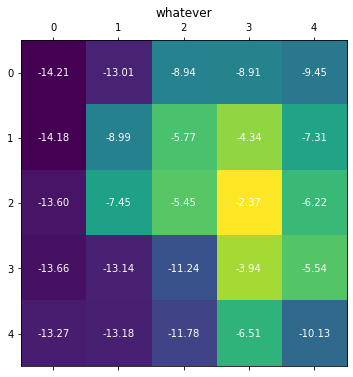

In [20]:
plotmat(np.log(Z[4, :25]).reshape(5,5), 'whatever', annotated=True, figsize=(6,6))
plt.show()